# LeoTransitEvents Example

This notebook showcases the LeoTransitEvents vetter, which is an exovetter implementation of the individual transit events vetter in the Lazy Exoplanet Operations (LEO) package written by Michelle Kunimoto available at https://github.com/mkunimoto/LEO-vetter


In [1]:
from exovetter.tce import Tce
import lightkurve as lk
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib inline

# occasionally no cadences fall inside the transit windows when evaluating weights so divide by zero warnings can optionally be silenced
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning, message=".*divide by zero.*|.*invalid value.*")

## Setup and Vetting

Exovetter vetting alogrithms use TCE and lightkurve objects as input, the following TCE and light curve files were made for the known planet WASP-18 b in the TCE and lightcurves notebooks. 

In [2]:
# WASP-18 b TCE:
tce = Tce.from_json('wasp18b_tce')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

<Figure size 640x480 with 0 Axes>

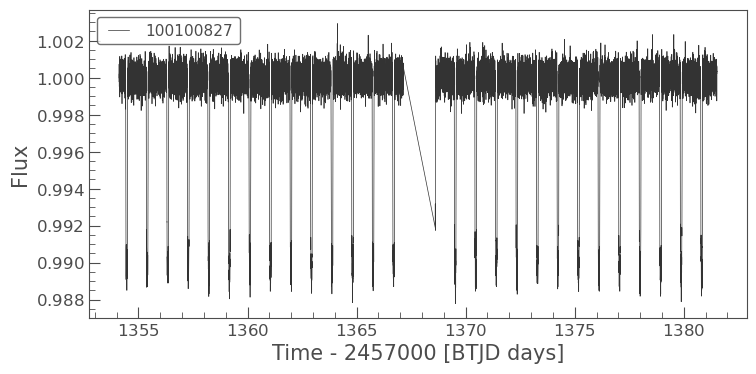

In [3]:
# Cleaned WASP-18 b lightkurve object
lc = lk.read('wasp18b.fits')

# plot light curve
plt.figure()
lc.plot()
plt.show()

Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.LeoTransitEvents`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
leo_instance = vet.LeoTransitEvents()
leo_results = leo_instance.run(tce, lc)

leo_results

{'sig_w': 0.0005321934086532481,
 'sig_r': 0,
 'err': 1.2881093446355147e-05,
 'SES_series': array([-0.17422814, -0.08170926, -0.22269192, ..., -0.4538739 ,
        -0.39901689, -0.15505459]),
 'dep_series': array([-1.96695328e-06,  3.57627869e-07, -4.94718552e-06, ...,
         7.27176666e-06,  4.70876694e-06,  4.70876694e-06]),
 'err_series': array([1.28848681e-05, 1.28886461e-05, 1.28848681e-05, ...,
        1.27877915e-05, 1.27877915e-05, 1.27951812e-05]),
 'MES_series': array([-0.15265607,  0.02774751, -0.38395314, ...,  0.56864914,
         0.36822362,  0.36801096]),
 'MES': 690.1150712727052,
 'SHP': 0.0034371370983888837,
 'CHI': 1253.0149243810413,
 'med_chases': 1.0,
 'mean_chases': 1.0,
 'max_SES': 137.8024487699431,
 'DMM': 0.9868134802104466,
 'chases': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'rubble': array([1.00297756, 0.98742587, 0.95632456, 0.99519854, 0.99908486,
        0.967983

In Leo's individual transit events, the results are as follows:
* sig_w : White noise following Hartman & Bakos (2016)
* sig_r : Red noise following Hartman & Bakos (2016)
* err : Signal-to-pink-noise following Pont et al. (2006)
* SES_series : Single Event Statistic series for every timestamp
* dep_series : Box-model transit depths
* err_series : Error of MES
* MES_series : dep_series/err_series
* MES : Multiple Event Statistic calculated from mean depth of in transit points
* SHP : MES shape metric
* CHI : CHI metric
* med_chases : median of chases
* mean_chases : mean of chases
* max_SES : maximum of SES 
* DMM : depth mean-to-median ratio
* chases : chases statistic, range for chases metric is between 1.5 and max_chases_phase transit durations
* rubble : rubble statistic


There are currently no diagnostic plots implemented into the LeoTransitEvents vetter

### Additional Options

`vet.LeoTransitEvents` also has options to set the thresholds for `chases_rubble_frac` (fraction of SES a nearby event has to be to trigger the Chases false alarm statistic) and `max_chases_phase` (fraction of the period out that Chases searches). The default values are 0.7 and 0.1 respectively. These specific vetters are described in more detail in the [Kepler DR25 Notes](https://archive.stsci.edu/files/live/sites/mast/files/home/missions-and-data/kepler/_documents/Thompson_2018_ApJS_235_38(1).pdf).



In [5]:
# For an example, decreasing the chases_rubble_frac allows more events to trigger and increasing max_chases_phase allows a longer time span for searching 
leo_instance = vet.LeoTransitEvents(chases_rubble_frac=0.001, max_chases_phase=1) 
leo_results = leo_instance.run(tce, lc)

leo_results

{'sig_w': 0.0005321934086532481,
 'sig_r': 0,
 'err': 1.2881093446355147e-05,
 'SES_series': array([-0.17422814, -0.08170926, -0.22269192, ..., -0.4538739 ,
        -0.39901689, -0.15505459]),
 'dep_series': array([-1.96695328e-06,  3.57627869e-07, -4.94718552e-06, ...,
         7.27176666e-06,  4.70876694e-06,  4.70876694e-06]),
 'err_series': array([1.28848681e-05, 1.28886461e-05, 1.28848681e-05, ...,
        1.27877915e-05, 1.27877915e-05, 1.27951812e-05]),
 'MES_series': array([-0.15265607,  0.02774751, -0.38395314, ...,  0.56864914,
         0.36822362,  0.36801096]),
 'MES': 690.1150712727052,
 'SHP': 0.0034371370983888837,
 'CHI': 1253.0149243810413,
 'med_chases': 0.14292150642978954,
 'mean_chases': 0.14313719491503687,
 'max_SES': 137.8024487699431,
 'DMM': 0.9868134802104466,
 'chases': array([0.14248521, 0.14346762, 0.14299573, 0.14324909, 0.14270642,
        0.14245493, 0.14252739, 0.14343034, 0.1431819 , 0.14293444,
        0.14268793, 0.14244233, 0.14253277, 0.14277684, 